1  - What is the difference between multithreading and multiprocessing?

Ans-
a. Multithreading

Definition:
Multithreading means running multiple threads (smallest units of a process) within a single process.
All threads share the same memory and resources, but they can execute different parts of code concurrently (appearing to run at the same time).

Example in real life:
Imagine a web browser —

One thread handles page loading

Another thread plays a video

Another handles user input
All are part of the same program, sharing memory and data.

Key Points:

Threads belong to one main process.

They share the same memory space.

They are lightweight and faster to start than processes.

In Python, because of the Global Interpreter Lock (GIL), only one thread runs Python code at a time, but multithreading is still great for I/O-bound tasks (like downloading files, waiting for input, etc.).

In [1]:
import threading
import time

def print_numbers():
    for i in range(1, 6):
        print(f"Number: {i}")
        time.sleep(1)

def print_letters():
    for ch in 'ABCDE':
        print(f"Letter: {ch}")
        time.sleep(1)

# Create threads
t1 = threading.Thread(target=print_numbers)
t2 = threading.Thread(target=print_letters)

# Start threads
t1.start()
t2.start()

# Wait for both to finish
t1.join()
t2.join()

print("Done!")


Number: 1
Letter: A
Number: 2
Letter: B
Number: 3
Letter: C
Number: 4Letter: D

Letter: E
Number: 5
Done!


b. Multiprocessing

Definition:
Multiprocessing means running multiple processes, each with its own memory space and Python interpreter.
Each process can run truly in parallel on multiple CPU cores — overcoming the GIL limitation.

Example in real life:
Imagine a restaurant kitchen with several cooks — each has their own tools (memory) and can cook separate dishes (tasks) independently.

Key Points:

Each process runs in its own memory space.

True parallelism is possible (especially for CPU-heavy tasks).

Heavier than threads — creating a process takes more system resources.

Good for CPU-bound tasks like image processing, data computation, etc.

In [2]:
import multiprocessing
import time

def square_numbers():
    for i in range(1, 6):
        print(f"Square of {i}: {i * i}")
        time.sleep(1)

if __name__ == "__main__":
    p1 = multiprocessing.Process(target=square_numbers)
    p2 = multiprocessing.Process(target=square_numbers)

    p1.start()
    p2.start()

    p1.join()
    p2.join()

    print("Done!")


Square of 1: 1
Square of 1: 1
Square of 2: 4
Square of 2: 4
Square of 3: 9
Square of 3: 9
Square of 4: 16
Square of 4: 16
Square of 5: 25
Square of 5: 25
Done!


In short:

Use multithreading for I/O-bound tasks.

Use multiprocessing for CPU-bound tasks.

2  - What are the challenges associated with memory management in Python?

Ans- Memory Management in Python (in short)

Python manages memory automatically using:

Private heap space (where all Python objects are stored)

Garbage collector (to free memory when objects are no longer in use)

Reference counting (to track how many variables refer to an object)

While this automation helps developers, it also comes with some challenges.

Challenges Associated with Memory Management in Python
1. Memory Leaks

Happens when objects are no longer needed but not released from memory.

Common causes:

Circular references (objects referring to each other)

Global variables or caches that never get cleared

Large data structures staying in memory unintentionally

a = []
b = [a]
a.append(b)  # circular reference

Even if you delete a and b, garbage collection might not free them immediately.

2. Garbage Collector Overhead

Python’s garbage collector periodically scans for unused objects.

This can add runtime overhead, especially in programs with many small, short-lived objects (like web servers).

Developers may need to tune or disable it for performance-critical code.

3. Fragmentation of Memory

Because Python’s memory allocator (called PyMalloc) handles many objects of different sizes, memory can get fragmented.

This means memory is available but scattered, making it harder for large objects to find continuous free space.

It leads to increased memory usage over time.

4. Global Interpreter Lock (GIL) Limitation

Even though Python can use multiple threads, only one thread executes Python bytecode at a time.

This limits efficient CPU usage for memory-heavy multithreaded programs.

5. Objects Staying in Memory Longer Than Expected

Python caches small integers and strings for performance (called interning).

These stay in memory for the entire runtime, even if you don’t need them later.

6. Difficulty in Handling Large Data

For programs that process large datasets (e.g., images, machine learning), Python can consume a lot of memory because:

Every object (even small ones) has metadata overhead.

Lists and dictionaries are dynamic and require extra space.

In summary

Main challenges:

Memory leaks

Garbage collection overhead

Memory fragmentation

GIL limitation

Inefficient handling of large objects

Despite these, Python’s automatic memory management makes programming easier — you just need to be aware of these pitfalls when optimizing performance or handling large-scale data.

3  - 3:Write a Python program that logs an error message to a log file when a
division by zero exception occurs.



In [3]:
import logging

# Configure the logging settings
logging.basicConfig(
    filename="error_log.txt",        # log file name
    level=logging.ERROR,             # log only ERROR level messages
    format="%(asctime)s - %(levelname)s - %(message)s"  # log format
)

try:
    # Example code that may raise an exception
    num1 = int(input("Enter numerator: "))
    num2 = int(input("Enter denominator: "))

    result = num1 / num2
    print("Result:", result)

except ZeroDivisionError as e:
    print("Error: Division by zero is not allowed.")
    logging.error("Division by zero error occurred: %s", e)

except Exception as e:
    print("An unexpected error occurred.")
    logging.error("Unexpected error: %s", e)


Enter numerator: 45
Enter denominator: 4
Result: 11.25


Explanation:

import logging – imports Python’s built-in logging module.

basicConfig() – sets up the log file, level, and format.

The program takes two numbers from the user and tries to divide them.

If a ZeroDivisionError occurs, it:

Prints an error message on the console.

Logs the detailed error in error_log.txt.

Any other unexpected error is also logged.

4  - Write a Python program that reads from one file and writes its content to
another file.



In [4]:
# Program to read from one file and write its content to another file

# Input and output file names
source_file = "source.txt"
destination_file = "copy.txt"

try:
    # Open the source file in read mode
    with open(source_file, "r") as src:
        # Read all content
        content = src.read()

    # Open the destination file in write mode
    with open(destination_file, "w") as dest:
        # Write the content
        dest.write(content)

    print(f"Content successfully copied from '{source_file}' to '{destination_file}'.")

except FileNotFoundError:
    print(f"Error: The file '{source_file}' was not found.")

except Exception as e:
    print("An unexpected error occurred:", e)


Error: The file 'source.txt' was not found.


Explanation:

with open(source_file, "r") as src:
Opens the source file in read mode and ensures it closes automatically after use.

content = src.read()
Reads the entire content of the file.

with open(destination_file, "w") as dest:
Opens (or creates) the destination file in write mode.

dest.write(content)
Writes the content read from the source file.

The program handles errors like missing source files safely using try-except.

5 - Write a program that handles both IndexError and KeyError using a
try-except block.



In [5]:
# Example program to handle IndexError and KeyError
def handle_exceptions():
    try:
        # Code that may raise IndexError
        my_list = [1, 2, 3]
        print("Accessing 5th element in the list:", my_list[4])  # This will raise IndexError

        # Code that may raise KeyError
        my_dict = {"a": 1, "b": 2}
        print("Accessing non-existent key in dictionary:", my_dict["c"])  # This will raise KeyError

    except IndexError as e:
        print(f"IndexError occurred: {e}")

    except KeyError as e:
        print(f"KeyError occurred: {e}")

# Call the function
handle_exceptions()


IndexError occurred: list index out of range


Explanation:
IndexError: Raised when trying to access an index that is out of range in a list.
KeyError: Raised when trying to access a key that does not exist in a dictionary.
try-except block: Handles both exceptions separately, providing specific error messages for each.

6  - What are the differences between NumPy arrays and Python lists?

Ans- 1. Data Type

NumPy Array: All elements must be of the same data type (e.g., all integers or all floats).

Python List: Can contain different data types in the same list (e.g., int, float, string).

🔹 2. Performance

NumPy Array: Much faster — implemented in C and stores data in contiguous memory.

Python List: Slower — implemented in Python, and each element is a separate object in memory.

🔹 3. Memory Usage

NumPy Array: More memory efficient, stores raw data compactly without extra object overhead.

Python List: Consumes more memory, as each element holds additional object metadata.

🔹 4. Mathematical Operations

NumPy Array: Supports vectorized operations — you can perform element-wise addition, subtraction, etc., directly.

Python List: Does not support vectorized operations — you must use loops or list comprehensions.

🔹 5. Functionality

NumPy Array: Provides many built-in mathematical, statistical, and linear algebra functions.

Python List: Provides only basic operations like append, remove, sort, etc.

🔹 6. Dimensionality

NumPy Array: Can be multi-dimensional (1D, 2D, 3D, etc.) — ideal for matrix operations.

Python List: Mostly 1D, though lists of lists can simulate 2D — but less efficient.

🔹 7. Behavior with “+” Operator

NumPy Array: Performs element-wise addition.

Python List: Performs concatenation of lists.

In [ ]:
import numpy as np

# NumPy Array
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a + b)  # Output: [5 7 9]

# Python List
x = [1, 2, 3]
y = [4, 5, 6]
print(x + y)  # Output: [1, 2, 3, 4, 5, 6]


 7  - 🔹 1. Purpose

map() → Used only with Series (one column) to transform or map values element-wise.

apply() → Used with both Series and DataFrames to apply a custom function along an axis (rows or columns).

🔹 2. Scope

map() → Works on individual elements of a Series.

apply() → Works on entire rows or columns (for DataFrame) or elements (for Series).

🔹 3. Syntax
Series.map(function)
DataFrame.apply(function, axis=0 or 1)


axis=0 → Apply function to each column

axis=1 → Apply function to each row

🔹 4. Return Type

map() → Always returns a Series.

apply() → Can return a Series, DataFrame, or even a scalar, depending on the function used.

🔹 5. Use Cases

map() → When you want to apply a function, dictionary, or mapping to each value of a single column.

apply() → When you want to apply a function across multiple columns or rows.

✅ Example using map()

In [1]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])

# Add 10 to each element
print(s.map(lambda x: x + 10))


0    11
1    12
2    13
3    14
dtype: int64


✅ Example using apply()

In [2]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})

# Sum each row
print(df.apply(lambda x: x.sum(), axis=1))


0    11
1    22
2    33
dtype: int64


8  - Create a histogram using Seaborn to visualize a distribution.

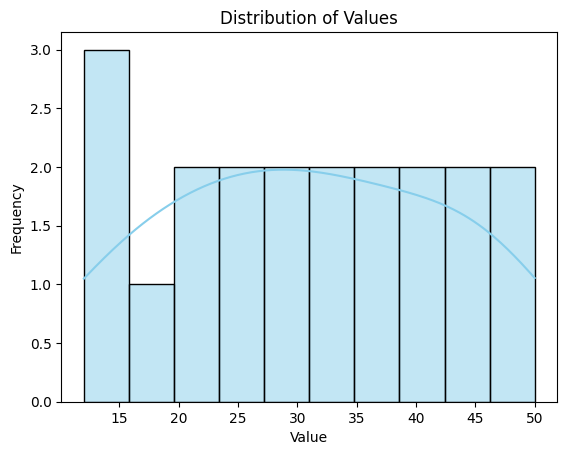

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 13, 19, 21, 22, 25, 25, 28, 30, 32, 33, 35, 37, 40, 42, 45, 46, 47, 50]

# Create a histogram
sns.histplot(data, bins=10, kde=True, color='skyblue')

# Add labels and title
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()


Explanation:

sns.histplot() → Creates a histogram.

data → The dataset to plot.

bins=10 → Divides the range into 10 intervals.

kde=True → Adds a smooth curve (Kernel Density Estimate) showing the distribution shape.

color='skyblue' → Sets the color of the bars.

plt.xlabel() / plt.ylabel() / plt.title() → Add labels and title to the chart.

9  -  Use Pandas to load a CSV file and display its first 5 rows.

In [4]:
import pandas as pd

# Load the CSV file (replace 'data.csv' with your actual file name)
df = pd.read_csv('data.csv')

# Display the first 5 rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

xplanation:

import pandas as pd → Imports the Pandas library.

pd.read_csv('data.csv') → Reads the CSV file and loads it into a DataFrame.

df.head() → Displays the first 5 rows of the DataFrame (you can pass a number, e.g. df.head(10) to show 10 rows).

10  -  Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.

                 Age    Salary  Experience
Age         1.000000  0.984798    1.000000
Salary      0.984798  1.000000    0.984798
Experience  1.000000  0.984798    1.000000


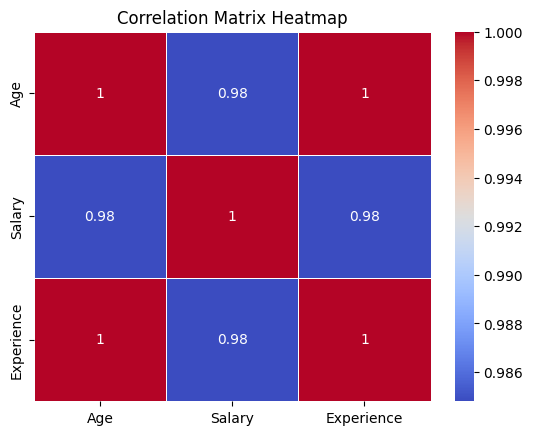

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Age': [25, 30, 35, 40, 45],
    'Salary': [40000, 50000, 60000, 80000, 100000],
    'Experience': [1, 3, 5, 7, 9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr = df.corr()

# Display correlation matrix
print(corr)

# Visualize with Seaborn heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show plot
plt.show()
